# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)
    
    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

### Note
two changes to mplleaflet files:

~\anaconda3\Lib\site-packages\mplleaflet\mplexporter.utils.py

    AttributeError: 'XAxis' object has no attribute '_gridOnMajor'
    
    fix: replace call with '_major_tick_kw['gridOn']'
    
~\anaconda3\Lib\site-packages\mplleaflet\mplexporter.exporter.py

    AttributeError: 'PathCollection' object has no attribute 'get_offset_position'
    
    fix: replace offset_order = offset_dict[collection.get_offset_position()]
            by   offset_order = offset_dict[collection._offset_position]

In [2]:
# load assigned data
binsize = 400
hashid = 'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89'
data = pd.read_csv('data/C2A2_data/BinnedCsvs_d{}/{}.csv'.format(binsize,hashid))

In [3]:
# remove Feb 29 from data
mask = data['Date'].str.contains("-02-29")
data = data[~mask]

In [4]:
# split 2015 data from the rest
data1 = data[~data['Date'].str.contains("2015")]
data2 = data[data['Date'].str.contains("2015")]
data2.size

55028

In [5]:
# remove years from dates to get max and mins for each day accross all years
data1 = data1.replace(to_replace='20[^d][^d]-',value='',regex=True)
data1.head()

,ID,Date,Element,Data_Value
0,USW00094889,11-12,TMAX,22
1,USC00208972,04-29,TMIN,56
2,USC00200032,05-26,TMAX,278
3,USC00205563,11-11,TMAX,139
4,USC00200230,02-27,TMAX,-106


In [6]:
# get max and min temps grouped and ordered by date
data_tmax = data1[data1['Element'] == 'TMAX']
data_tmin = data1[data1['Element'] == 'TMIN']

In [7]:
max_by_date = data_tmax.groupby('Date').agg({'Data_Value':max}).reset_index()
max_by_date.head()

,Date,Data_Value
0,01-01,156
1,01-02,139
2,01-03,133
3,01-04,106
4,01-05,128


In [8]:
min_by_date = data_tmin.groupby('Date').agg({'Data_Value':min}).reset_index()
min_by_date.size

730

In [9]:
# get the values for x and y axes in list form
date = list(max_by_date['Date'])
tmax = list(max_by_date['Data_Value'])
tmin = list(min_by_date['Data_Value'])

In [10]:
# convert date strings to datetime objects for plotting
import matplotlib.dates as dates

dates_list = dates.num2date(dates.datestr2num(date))

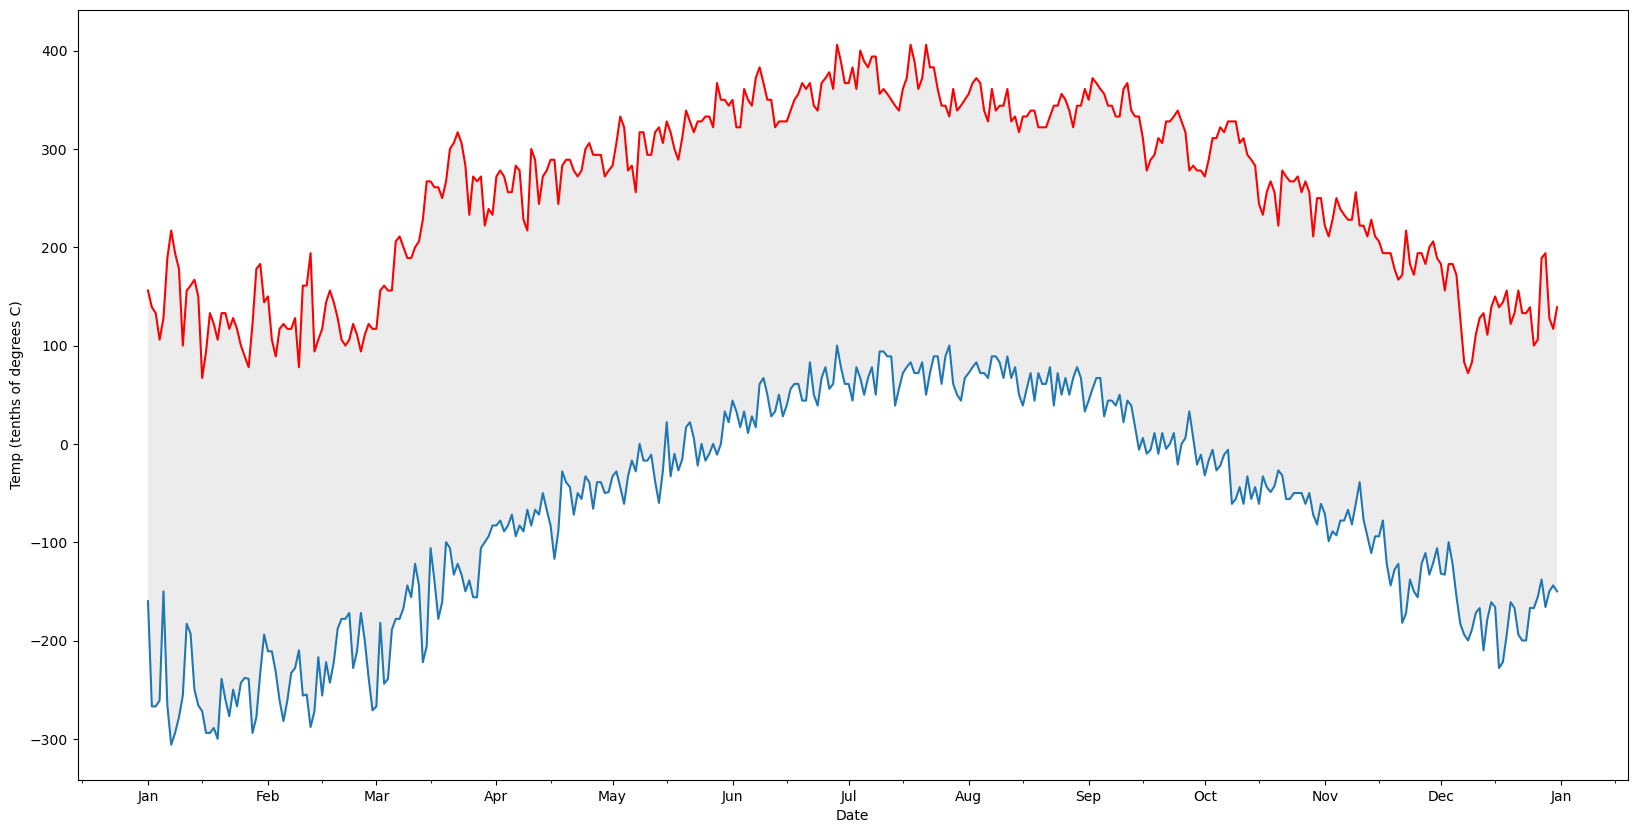

In [11]:

from matplotlib.dates import MonthLocator, DateFormatter

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(dates_list,tmax,'r',label='High Temps')
plt.plot(dates_list,tmin,label='Low Temps')
ax.set_ylabel('Temp (tenths of degrees C)')
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(DateFormatter('%b'))
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_minor_locator(MonthLocator(bymonthday=15))

ax.fill_between(dates_list,tmin,tmax,facecolor='gray',alpha=0.15)

plt.show()

In [12]:
data2.head()

,ID,Date,Element,Data_Value
19,USC00205563,2015-01-03,TMIN,-39
30,USC00203712,2015-03-17,TMAX,189
34,USC00200032,2015-06-06,TMIN,128
46,USW00014833,2015-08-30,TMIN,178
50,USC00202308,2015-08-30,TMIN,156


In [13]:
tmax_2015 = data2[data2['Element'] == 'TMAX']
tmin_2015 = data2[data2['Element'] == 'TMIN']

In [14]:
tmax_2015.sort_values(by='Date',inplace=True)
tmin_2015.sort_values(by='Date',inplace=True)

In [15]:
#tmax_bydate_2015 = tmax_2015.groupby('Date').agg({'Data_Value':max}).reset_index()
#tmin_bydate_2015 = tmin_2015.groupby('Date').agg({'Data_Value':min}).reset_index()

tmax_bydate_2015 = tmax_2015.replace(to_replace='20[^d][^d]-',value='',regex=True
                                    ).reset_index().filter(['Date','Data_Value'],axis=1)
tmin_bydate_2015 = tmin_2015.replace(to_replace='20[^d][^d]-',value='',regex=True
                                    ).reset_index().filter(['Date','Data_Value'],axis=1)


In [16]:
# define function that will produce list all 2015 temps that break High or Low records
# as well as a list of the corresponding dates
def get_record_temps(temps, HL):
    
    dates = []
        
    if HL == 'high':
        new_highs = []
        for index, row in temps.iterrows():
            record_high = max_by_date[max_by_date['Date'] == row['Date']]['Data_Value'].iloc[0]
            if record_high < (row['Data_Value']):
                
                new_highs.append(row['Data_Value'])
                dates.append(row['Date'])
                
                #print("date: ", row['Date'])
                #print("index: ",index)
                #print("record high: ", row['Data_Value'])
                #print("old record: ", old_record)
                #print()
            
        return dates, new_highs
                
    elif HL == 'low':
        new_lows = []
        for index, row in temps.iterrows():
            record_low = min_by_date[min_by_date['Date'] == row['Date']]['Data_Value'].iloc[0]
            if record_low > (row['Data_Value']):
                
                new_lows.append(row['Data_Value'])
                dates.append(row['Date'])
                
                #print("date: ", row['Date'])
                #print("index: ",index)
                #print("record low: ", row['Data_Value'])
                #print("old record: ", old_record)
                #print()
        
        return dates, new_lows
        

In [17]:
dates_high, new_high_list = get_record_temps(tmax_bydate_2015,'high')
dates_high = dates.num2date(dates.datestr2num(dates_high))
dates_low, new_low_list = get_record_temps(tmin_bydate_2015,'low')
dates_low = dates.num2date(dates.datestr2num(dates_low))

In [18]:
dates_low, new_low_list = get_record_temps(tmin_bydate_2015,'low')
dates_low = dates.num2date(dates.datestr2num(dates_low))

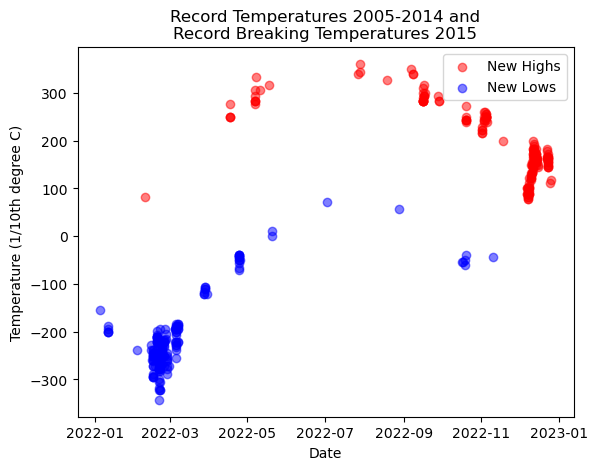

In [19]:
# overlay scatterplot of new highs and lows
plt.scatter(dates_high, new_high_list,alpha=0.5,c='red',label='New Highs')
plt.scatter(dates_low, new_low_list,alpha=0.5,c='blue',label='New Lows')

plt.title('Record Temperatures 2005-2014 and\nRecord Breaking Temperatures 2015')
plt.xlabel('Date')
plt.ylabel('Temperature (1/10th degree C)')

plt.legend(loc="upper right")

plt.show()